# <font color='steelblue'>A/B Test on Free Trial Screener</font>
### Yixi Chen

## <font color='steelblue'>1. Experiment Overview</font>

At the time of this experiment, Udacity courses currently have two options on the course overview page: "Start Free Trial", and "access course materials". If the student clicks "Start Free Trial", they will be asked to enter their credit card information, and then they will be enrolled in a free trial for the paid version of the course. After 14 days, they will automatically be charged unless they cancel first. If the student clicks "access course materials", they will be able to view the videos and take the quizzes for free, but they will not receive coaching support or a verified certificate, and they will not submit their final project for feedback.

In the experiment, Udacity will test a change where if the student clicked "Start Free Trial", they were asked how much time they had available to devote to the course. If the student indicated 5 or more hours per week, they would be taken through the checkout process as usual. If they indicated fewer than 5 hours per week, a message would appear indicating that Udacity courses usually require a greater time commitment for successful completion, and suggesting that the student might like to access the course materials for free. At this point, the student would have the option to continue enrolling in the free trial, or access the course materials for free instead. The following screenshot shows what the experiment looks like.

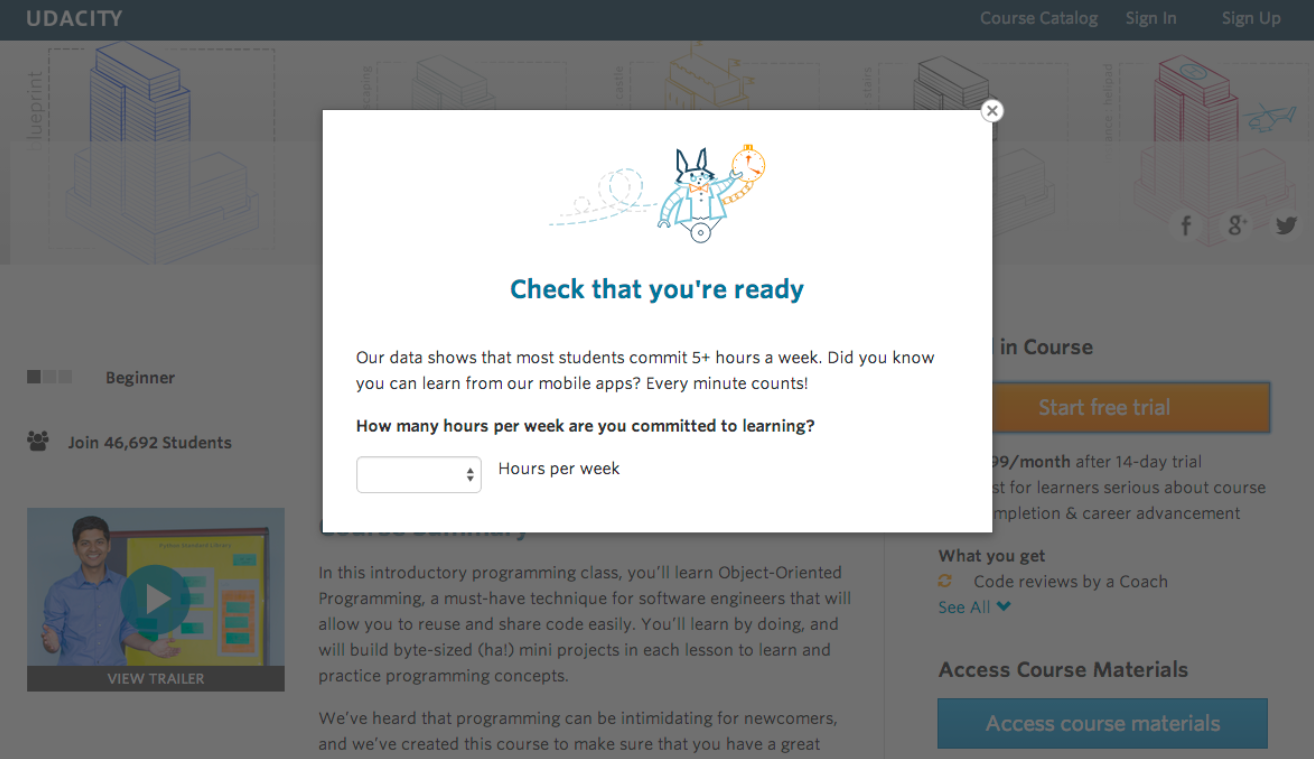

The hypothesis is that this might set clearer expectations for students upfront, thus reducing the number of frustrated students who left the free trial because they didn't have enough time—without significantly reducing the number of students to continue past the free trial and eventually complete the course. If this hypothesis held true, Udacity could improve the overall student experience and improve coaches' capacity to support students who are likely to complete the course.


The <font color='steelblue'>unit of diversion</font> is <font color='steelblue'><b>a cookie</b></font>, although if the student enrolls in the free trial, they are tracked by user-id from that point forward. The same user-id cannot enroll in the free trial twice. For users that do not enroll, their user-id is not tracked in the experiment, even if they were signed in when they visited the course overview page.

## <font color='steelblue'>2. Experiment Design</font>

### <font color='steelblue'>2.1 Metric Choice</font>

A few candidate metrics to evaluate this experiment are defined as follows for consideration. The <font color='steelblue'>practical significance boundary</font> for each metric, that is, the difference that would have to be observed before that was a meaningful change for the business, is given in parentheses. All practical significance boundaries are given as absolute changes. Note that any place "unique cookies" are mentioned, the uniqueness is determined by day. (That is, the same cookie visiting on different days would be counted twice.) User-ids are automatically unique since the site does not allow the same user-id to enroll twice.

- <b>Number of cookies:</b> That is, number of unique cookies to view the course overview page. <font color='steelblue'>($d_{min}$=3000)</font>
- <b>Number of clicks:</b> That is, number of unique cookies to click the "Start free trial" button (which happens before the free trial screener is trigger). <font color='steelblue'>($d_{min}$=240)</font>
- <b>Number of user-ids (number of enrollments):</b> That is, number of users who enroll in the free trial. <font color='steelblue'>($d_{min}$=50)</font>
- <b>Click-through-probability:</b> That is, number of unique cookies to click the "Start Free Trial" button divided by number of unique cookies to view the course overview page. <font color='steelblue'>($d_{min}$=0.01)</font>
- <b>Gross conversion:</b> That is, number of user-ids to complete checkout and enroll in the free trial divided by number of unique cookies to click the "Start Free Trial" button. <font color='steelblue'>($d_{min}$=0.01)</font>
- <b>Retention:</b> That is, number of user-ids to remain enrolled past the 14-day boundary (and thus make at least one payment) divided by number of user-ids to complete checkout. <font color='steelblue'>($d_{min}$=0.01)</font>
- <b>Net conversion:</b> That is, number of user-ids to remain enrolled past the 14-day boundary (and thus make at least one payment) divided by the number of unique cookies to click the "Start Free Trial" button. <font color='steelblue'>($d_{min}$=0.0075)</font>

In [7]:
# Store the practical significance boundary value for each metric
dmin_page_uv = 3000
dmin_clk_uv = 240
dmin_enrl_uv = 50
dmin_ctp = 0.01
dmin_gro_conv = 0.01
dmin_ret = 0.01
dmin_net_conv = 0.0075

For each of them, I will explain whether I would use it as an invariant metric or an evaluation metric. 

- <b>Number of cookies</b><br>
    I will choose this one as an <b>invariant</b>, because this will be the population size that shouldn't change across the experiment and the control groups.

- <b>Number of clicks</b><br>
    I will choose this one as another <b>invariant</b>, because the pop-up window only appears after users click on the "Start Free Trial" button. Therefore, the number of clicks itself shouldn't see a significant change across the two groups.

- <b>Number of user-ids (number of enrollments)</b><br>
    According to the hypothesis, students that did not have enough time to achieve the whole course would be deterred when seeing the pop-up screener, and thus the number of users who would enroll in the free trial, indicated by this metric, would decrease in the experiment group. While this metric would be affected by the screener, the goal of the experiment is definitely not to simply reduce the number of user-ids. So I would not choose it as an evaluation metric as it does not reflect the goal of the experiment.

- <b>Click-through-probability</b><br>
    Since both the denominator(Number of cookies) and numerator(Number of clicks) of the click-through-probability should be evenly split into two groups across the test, this metric is supposed to be roughly the same between the experiment and the control, which makes it a good choice as the third <b>invariant</b>.

- <b>Gross conversion</b><br>
    Given the hypothesis that less users in the experiment group would progress to the enrollment after seeing the pop-up message and the number of clicks shouldn't vary from group to group, this metric would be affected by the screener negatively. Besides, this metric reflects the goal of Udacity's test, which is to encourage students without enough time only to access course materials for free rather than enroll. Therefore, I choose to track this one as an <b>evaluation</b> metric, and it is expected to see the gross coversion of the experiment lower than that of the control.

- <b>Retention</b><br>
    As the hypothesis stated, the screener should only filter out the users that don't have enough time -- without significantly reducing the number of students to continue past the free trial and eventually complete the course. Therefore, the numerator of retention is supposed to remain unchanged between groups, while the denominator should be reduced due to the screener, resulting in a lower retention of the experiment group. Besides, since this retention is defined over a time span of 14 days, which is not too long for an A/B test to track. This one is also a good candidate for <b>evaluation</b> metrics.

- <b>Net conversion</b><br>
    If the experiment went as the hypothesis stated, the number of students to continue past the free trial and eventually complete the course should not be affected by the screener negatively, and the number of clicks should be stable. Therefore, this metric should remain unchanged. I think it is necessary and important to track this one as an <b>evaluation</b> metric because the overall goal of Udacity is to <b>reduce the gross conversion while ensure the net conversion would not drop</b>. In that case they could improve the overall student experience and improve coaches' capacity without reducing the revenue from the payment after the 14-days free trial.
    
<font color='steelblue'><b>Key takeaway:</b></font><br>
1. Invariant doesn't mean that a metric wouldn't change at all during the test. Instead, an invariant might be influenced by factors outside the change of the test and thus fluctuate. But it should remain roughly the same between the two groups.<br>
2. Whether or not a metric would be affected by the change and thus moves in the experiment should not be treated as the only rule to determine the evaluation metrics. Sometimes we might need to track some metrics that <b>shouln't change</b> to make sure other sides of business would not be negatively impacted by the experiment.

### <font color='steelblue'>2.2 Measuring Variability of Metrics</font>

Measuring variability of metrics is important before running a test in that standard deviation of metrics will be used to size the experiment, analyze the confidence intervals, and draw conclusion. Following are the rough estimates of the baseline values for the candidates metrics. For each of the 3 metris I chose as evaluation metrics, I will estimate its standard deviation analytically given a sample size of <font color='steelblue'>5,000 cookies</font> visiting the course overview page.

In [1]:
# Unique cookies to view course overview page per day:
base_page_uv = 40000
# Unique cookies to click "Start free trial" per day:
base_clk_uv = 3200
# Enrollments per day:
base_enrl_uv = 660
# Click-through-probability on "Start free trial":
base_ctp = 0.08
# Gross conversion: Probability of enrolling, given click:
base_gro_conv = 0.20625
# Retention: Probability of payment, given enroll:
base_ret = 0.53
# Net conversion: Probability of payment, given click
base_net_conv = 0.1093125

Note that the sample size of 5,000 page view cookies is not the sample size for the 3 metrics. First of all, I need to calculate the sizes of unique cookies to click and to enroll based on the ratios reflected in the baseline values.

In [5]:
samp_page_uv = 5000
samp_clk_uv = samp_page_uv * base_ctp
samp_enrl_uv = base_enrl_uv/base_page_uv * samp_page_uv
print("Sample size of Number of Clicks:",samp_clk_uv)
print("Sample size of Enrollments:", samp_enrl_uv)

Sample size of Number of Clicks: 400.0
Sample size of Enrollments: 82.5


To compute the standard errors for the 3 probability metrics analytically, i.e. using Central Limit Theorem, I need to first check whether the conditions hold here:
1. Independence: Since the unit of diversion and unit of analysis are both cookie-based, it is safe to assume that the sampled cookies (proxy for users) acted independently from each other. Therefore, "sampled observations must be independent" holds here.
2. Sample size/skew: Using the sample size of clicks and enrollments and the baseline values of 3 metrics, it's easy to know the number of "success/failure" cases are all above 10. So the second condition also holds.

Therefore, it can be expected that the analytic estimates would be comparable to the the empirical variability, and no need to  conduct an empirical estimate even if there is time.

In [6]:
# Function to calculate standard error for a probability metric
import math
def p_se(prop, sample_size):
    return math.sqrt(prop*(1-prop)/sample_size)

se_gro_conv = p_se(base_gro_conv, samp_clk_uv)
se_ret = p_se(base_ret, samp_enrl_uv)
se_net_conv = p_se(base_net_conv, samp_clk_uv)

print("Standard error for Gross Conversion:",round(se_gro_conv,4))
print("Standard error for Retention:",round(se_ret,4))
print("Standard error for Net Conversion:",round(se_net_conv,4))

Standard error for Gross Conversion: 0.0202
Standard error for Retention: 0.0549
Standard error for Net Conversion: 0.0156


I notice that Retention has a higher variability compared to Gross Conversion and Net Conversion, which indicates much larger traffic might be required in the real test to detect a practically significant change in Retention considering the lower probability of payment given click. I will check the experiment size estimated by using Retention later to finally determine whether we should use it as an evaluation metric.

### <font color='steelblue'>2.3 Sizing the Experiment</font>
#### <font color='steelblue'>2.3.1 Choosing Number of Samples Given Power</font>

In this test, the unit of diversion and the unit of analysis are both <font color='steelblue'>cookie-based</font>. This means independence assumption is valid when diverting cookies to the two groups in the test. Consequently, the analytical variability we estimated above will not be lower than the empirical one, and thus no need to use Bonferroni correction to adjust the significance level $\alpha$.

Since we need to ensure that the test has enough power for each metric, I will calculate the number of samples needed for the test for each metric respectively using the following formula:<br>
$$n=\frac{(Z_{1-\frac{\alpha}{2}}sd_{1}+Z_{1-\beta}sd_{2})^{2}}{d^{2}}$$<br>
with:
$$sd_{1}=\sqrt{p(1-p)+p(1-p)}$$
$$sd_{2}=\sqrt{p(1-p)+(p+d)(1-(p+d))}$$<br>
where $\alpha$ is the significance level, $1-\beta$ is the power of test, $Z$ is the z-score value given a certain significance level, $p$ is the baseline value of a probability metric, and $d$ is the practical significance boundary for this metric, or in other words, the minimal difference we would like to detect in a test.

A significance level $\alpha$ of 0.05 and a power of $1-\beta$ of 0.8 will be used in the experiment.

In [14]:
# Function to calculate sample size given significance level, power, a baseline value of a probability metric and d_min
from scipy import stats

def sample_size(alpha, power, p, d_min):
    sd1 = math.sqrt(p*(1-p)+p*(1-p))
    sd2 = math.sqrt(p*(1-p)+(p+d_min)*(1-(p+d_min)))
    z1 = stats.norm.ppf(1-alpha/2)
    z2 = stats.norm.ppf(power)
    n = (z1*sd1+z2*sd2)**2/d_min**2
    return n

Since this function actually calculates the size on which the metric is calculated, i.e. the size of a metric's denominator, I will convert it to the size of unique pageview cookies and then multiply by 2 (2 groups: experiment and control) to get the entire traffic needed by the test.

In [21]:
size_gro_conv = sample_size(0.05,0.8,base_gro_conv,dmin_gro_conv) / base_ctp *2
size_ret = sample_size(0.05,0.8,base_ret,dmin_ret) / (base_enrl_uv/base_page_uv) *2
size_net_conv = sample_size(0.05,0.8,base_net_conv,dmin_net_conv) / base_ctp *2

print("Sample Size Estimated Using Gross Conversion:",'{:,.0f}'.format(math.ceil(size_gro_conv)))
print("Sample Size Estimated Using Retention:",'{:,.0f}'.format(math.ceil(size_ret)))
print("Sample Size Estimated Using Net Conversion:",'{:,.0f}'.format(math.ceil(size_net_conv)))

Sample Size Estimated Using Gross Conversion: 645,868
Sample Size Estimated Using Retention: 4,737,771
Sample Size Estimated Using Net Conversion: 685,334


Now it is clear that the sample size required to ensure the power to detect practical change in Retention is indeed much larger. Considering the total daily traffic of Udacity (40,000 cookies/day), the test would have to last nearly <font color='steelblue'>120 days</font> even if we diverted the whole traffic into the test, which is obviously not practical. Therefore, I will not use Retention as an evaluation metric.

To ensure the test power for both Gross and Net Conversion, I will use the larger sample size: <font color='steelblue'>685,334 unique pageview cookies</font>

#### <font color='steelblue'>2.3.2 Choosing Duration vs. Exposure</font>

First I will calculate different pairs of traffic fractions and days needed, and visualize the relationship.

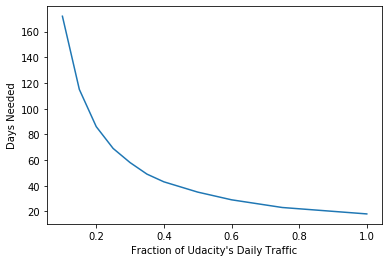

In [39]:
# Calculate days needed given different fraction of traffic
size_final = size_net_conv
exp_frac = [i/100 for i in range(10,101,5)]
days = [math.ceil(size_final/(base_page_uv*frac)) for frac in exp_frac]

# Plot the relationship between days needed and fraction of traffic diverted to the experiment
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(exp_frac,days)
plt.xlabel("Fraction of Udacity's Daily Traffic")
plt.ylabel("Days Needed")
plt.show()

Given that the number of users who finished the 14-days free trial and finished at least one payment to calculate Net Conversion can only be collected after 2 weeks of the experiment, it is better to run the experiment for more than one month. And since the change in the experiment is only a mild reminder rather than restriction on the access to free trial, this experiment is not very risky for Udacity. Therefore, I choose divert <font color='steelblue'>45%</font> of Udacity's total daily traffic to the experiment, and the days needed is roughly <font color='steelblue'>39 days</font>.

## <font color='steelblue'>3. Experiment Analysis</font>

### <font color='steelblue'>3.1 Sanity Checks</font>

Let's load the data first and take a look.

In [43]:
import pandas as pd

experiment = pd.read_csv('Experiment.csv')
control = pd.read_csv('Control.csv')

In [44]:
experiment

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7716,686,105.0,34.0
1,"Sun, Oct 12",9288,785,116.0,91.0
2,"Mon, Oct 13",10480,884,145.0,79.0
3,"Tue, Oct 14",9867,827,138.0,92.0
4,"Wed, Oct 15",9793,832,140.0,94.0
5,"Thu, Oct 16",9500,788,129.0,61.0
6,"Fri, Oct 17",9088,780,127.0,44.0
7,"Sat, Oct 18",7664,652,94.0,62.0
8,"Sun, Oct 19",8434,697,120.0,77.0
9,"Mon, Oct 20",10496,860,153.0,98.0


In [45]:
control

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7723,687,134.0,70.0
1,"Sun, Oct 12",9102,779,147.0,70.0
2,"Mon, Oct 13",10511,909,167.0,95.0
3,"Tue, Oct 14",9871,836,156.0,105.0
4,"Wed, Oct 15",10014,837,163.0,64.0
5,"Thu, Oct 16",9670,823,138.0,82.0
6,"Fri, Oct 17",9008,748,146.0,76.0
7,"Sat, Oct 18",7434,632,110.0,70.0
8,"Sun, Oct 19",8459,691,131.0,60.0
9,"Mon, Oct 20",10667,861,165.0,97.0


The meaning of each column is:<br>
- Pageviews: Number of unique cookies to view the course overview page that day.
- Clicks: Number of unique cookies to click the course overview page that day.
- Enrollments: Number of user-ids to enroll in the free trial that day.
- Payments: Number of user-ids who who enrolled on that day to remain enrolled for 14 days and thus make a payment. (Note that the date for this column is the start date, that is, the date of enrollment, rather than the date of the payment. The payment happened 14 days later. Because of this, the enrollments and payments are tracked for 14 fewer days than the other columns.)

I will start by calculating proportion metrics for each group. 

In [48]:
# Click-through-probability
experiment['CTP']=experiment.Clicks/experiment.Pageviews
control['CTP']=control.Clicks/control.Pageviews

# Gross Conversion
experiment['GrossConversion']=experiment.Enrollments/experiment.Clicks
control['GrossConversion']=control.Enrollments/control.Clicks

# Net Conversion
experiment['NetConversion']=experiment.Payments/experiment.Clicks
control['NetConversion']=control.Payments/control.Clicks

In [49]:
experiment.head()

,Date,Pageviews,Clicks,Enrollments,Payments,CTP,GrossConversion,NetConversion
0,"Sat, Oct 11",7716,686,105.0,34.0,0.088906,0.153061,0.049563
1,"Sun, Oct 12",9288,785,116.0,91.0,0.084518,0.147771,0.115924
2,"Mon, Oct 13",10480,884,145.0,79.0,0.084351,0.164027,0.089367
3,"Tue, Oct 14",9867,827,138.0,92.0,0.083815,0.166868,0.111245
4,"Wed, Oct 15",9793,832,140.0,94.0,0.084959,0.168269,0.112981


In [51]:
control.head()

,Date,Pageviews,Clicks,Enrollments,Payments,CTP,GrossConversion,NetConversion
0,"Sat, Oct 11",7723,687,134.0,70.0,0.088955,0.195051,0.101892
1,"Sun, Oct 12",9102,779,147.0,70.0,0.085586,0.188703,0.089859
2,"Mon, Oct 13",10511,909,167.0,95.0,0.086481,0.183718,0.104510
3,"Tue, Oct 14",9871,836,156.0,105.0,0.084693,0.186603,0.125598
4,"Wed, Oct 15",10014,837,163.0,64.0,0.083583,0.194743,0.076464


Then I will check whether the 3 invariant metrics are equivalent between the two groups. 

<font color='steelblue'>Number of Cookies(Pageviews in the dataframe)</font> and <font color='steelblue'>Number of Clicks</font> are simple counts that should be randomly split between the 2 groups, so I will use a binomial test with null hypothesis that proportion of samples in the control group should be roughly 0.5, and a significance level of 0.05.
For another invariant <font color='steelblue'>Click-through-probability</font>, I will need to construct a confidence interval for a difference in proportions, and then check whether the difference between group values falls within that confidence level.

In [56]:
# Function to calculate confidence interval
def conf_int(point_estimate, se, alpha):
    z = stats.norm.ppf(1-alpha/2)
    lower = point_estimate - se*z
    upper = point_estimate + se*z
    return(print('Lower boundary:',round(lower,4),'Upper boundary:',round(upper,4)))

In [60]:
# Sanity check on Number of Cookies
## Number of cookies for the experiment, the control, and the total test
exp_ttl_page_uv = sum(experiment.Pageviews)
cont_ttl_page_uv = sum(control.Pageviews)
ttl_page_uv = exp_ttl_page_uv + cont_ttl_page_uv

## Standard error of Pageviews in the test
test_se_page_uv = p_se(cont_ttl_page_uv/ttl_page_uv, ttl_page_uv)

## Confidence interval for porportion of cookies in the control
conf_int(0.5,test_se_page_uv,0.05)
print("Actual proportion of cookies in the control:",round(cont_ttl_page_uv/ttl_page_uv,4))

Lower boundary: 0.4988 Upper boundary: 0.5012
Actual proportion of cookies in the control: 0.5006


The actual proportion of cookies in the control group, <font color='steelblue'>0.5006</font>, is within the confidence interval, so we can say that we are 95% confident that it is <font color='steelblue'>not</font> significantly different from 0.5. <font color='steelblue'>The Number of Cookies passes the sanity check.</font>

In [61]:
# Sanity check on Number of Clicks
## Number of clicks for the experiment, the control, and the total test
exp_ttl_clk_uv = sum(experiment.Clicks)
cont_ttl_clk_uv = sum(control.Clicks)
ttl_clk_uv = exp_ttl_clk_uv + cont_ttl_clk_uv

## Standard error of Click in the test
test_se_clk_uv = p_se(cont_ttl_clk_uv/ttl_clk_uv, ttl_clk_uv)

## Confidence interval for porportion of clicks in the control
conf_int(0.5,test_se_clk_uv,0.05)
print("Actual proportion of clicks in the control:",round(cont_ttl_clk_uv/ttl_clk_uv,4))

Lower boundary: 0.4959 Upper boundary: 0.5041
Actual proportion of clicks in the control: 0.5005


The actual proportion of clicks in the control group, <font color='steelblue'>0.5005</font>, is within the confidence interval, so we can say that we are 95% confident that it is <font color='steelblue'>not</font> significantly different from 0.5. <font color='steelblue'>The Number of Clicks also passes the sanity check.</font>

In [63]:
# Sanity check on Click-Through-Probability
## Overall CTP for the experiment, the control
exp_ctp = exp_ttl_clk_uv/exp_ttl_page_uv
cont_ctp = cont_ttl_clk_uv/cont_ttl_page_uv

## Observed difference between the CTPs of two groups
obs_dif_ctp = exp_ctp - cont_ctp
print("Observed difference between the CTPs of two groups:",round(obs_dif_ctp,4))

## Standard error of the CTP difference
test_se_ctp = math.sqrt(exp_ctp*(1-exp_ctp)/exp_ttl_page_uv + cont_ctp*(1-cont_ctp)/cont_ttl_page_uv)

## Confidence interval for the CTP difference
conf_int(obs_dif_ctp,test_se_ctp,0.05)

Observed difference between the CTPs of two groups: 0.0001
Lower boundary: -0.0012 Upper boundary: 0.0014


The observed difference between the CTPs of the two groups is only <font color='steelblue'>0.0001</font>, and its 95% confidence interval includes 0. Therefore, we can say that we are 95% confident that the difference is <font color='steelblue'>not</font> significantly different from 0. <font color='steelblue'>The Click-Through-Probability passes the sanity check.</font>

Now that the invariants passed the sanity checks, we can move on to analyze the result. 

### <font color='steelblue'>3.2 Result Analysis</font>

Next, for the 2 evaluation metrics Gross Conversion and Net Conversion, I will calculate a confidence interval for the difference between the experiment and control groups, and check whether each metric is statistically and/or practically significance. A metric is statistically significant if the confidence interval does not include 0 (that is, I can be confident there was a change), and it is practically significant if the confidence interval does not include the practical significance boundary (that is, I can be confident there is a change that matters to the business.)<br>
Then I will run sign tests on the 2 metrics using day-by-day breakdown to cross-check the results from effect size tests.

#### <font color='steelblue'>3.2.1 Effect Size Tests</font>

In [78]:
# Effect Size Test on Gross Conversion
## Overall Gross Conversion of the experiment, the control for the first 23 days of the test
exp_gro_conv = sum(experiment.Enrollments[:23,])/sum(experiment.Clicks[:23,])
cont_gro_conv = sum(control.Enrollments[:23,])/sum(control.Clicks[:23,])

## Observed Gross Conversion difference between the experiment and the control
obs_diff_gc = exp_gro_conv - cont_gro_conv
print("Observed Gross Conversion difference between the experiment and the control:",round(obs_diff_gc,4))

## Standard error of the Gross Conversion difference
test_se_gc = math.sqrt(exp_gro_conv*(1-exp_gro_conv)/sum(experiment.Clicks[:23,]) + 
                       cont_gro_conv*(1-cont_gro_conv)/sum(control.Clicks[:23,]))

## Confidence interval for the Gross Conversion difference
conf_int(obs_diff_gc,test_se_gc,0.05)

Observed Gross Conversion difference between the experiment and the control: -0.0206
Lower boundary: -0.0291 Upper boundary: -0.012


The observed difference between the experiment and the control is <font color='steelblue'>-2.06%</font>, and its 95% confidence interval <font color='steelblue'>does not include 0</font>. Therefore, we can say that we are 95% confident that the Gross Conversion of the experiment group is lower than that of the control group, which agrees with the hypothesis: <font color='steelblue'>The screener message can reduce the number of enrollments from students who cannot commit enough time.</font><br>
Besides, this confidence interval <font color='steelblue'>does not include the practical boundary of Gross Conversion (-0.01 in this context)</font>, either.

In [77]:
# Effect Size Test on Net Conversion
## Overall Net Conversion of the experiment, the control for the first 23 days of the test
exp_net_conv = sum(experiment.Payments[:23,])/sum(experiment.Clicks[:23,])
cont_net_conv = sum(control.Payments[:23,])/sum(control.Clicks[:23,])

## Observed Net Conversion difference between the experiment and the control
obs_diff_nc = exp_net_conv - cont_net_conv
print("Observed Net Conversion difference between the experiment and the control:",round(obs_diff_nc,4))

## Standard error of the Net Conversion difference
test_se_nc = math.sqrt(exp_net_conv*(1-exp_net_conv)/sum(experiment.Clicks[:23,]) + 
                       cont_net_conv*(1-cont_net_conv)/sum(control.Clicks[:23,]))

## Confidence interval for the Gross Conversion difference
conf_int(obs_diff_nc,test_se_nc,0.05)

Observed Net Conversion difference between the experiment and the control: -0.0049
Lower boundary: -0.0116 Upper boundary: 0.0019


The observed Net Conversion difference between the experiment and the control is <font color='steelblue'>-0.49%</font>, and its 95% confidence interval <font color='steelblue'>does include 0</font>. Therefore, we can say that the Net Conversion of the experiment group is not significantly differenct from that of the control group, which also agrees with the hypothesis: <font color='steelblue'>The screener message would not reduce the number of payments from students who have enough time for study.</font>

#### <font color='steelblue'>3.2.2 Sign Tests</font>

In [86]:
# Sign Test on Gross Conversion
## Difference of Gross Conversion, day-by-day
daily_diff_gc = experiment.GrossConversion[:23,] - control.GrossConversion[:23,]

## Number of days that the Gross Conversion is lower in the experiment group
days_gc = sum(1 for i in daily_diff_gc if i<0)

## A two-sided binomial test
print("The probability of observing at least",days_gc,"days or at most",(23-days_gc),"days of negative difference is",round(stats.binom_test(days_gc,23,p=0.5,alternative='two-sided'),4))

The probability of observing at least 19 days or at most 4 days of negative difference is 0.0026


In [88]:
# Sign Test on Net Conversion
## Difference of Net Conversion, day-by-day
daily_diff_nc = experiment.NetConversion[:23,] - control.NetConversion[:23,]

## Number of days that the Net Conversion is lower in the experiment group
days_nc = sum(1 for i in daily_diff_nc if i<0)

## A two-sided binomial test
print("The probability of observing at least",days_nc,"days or at most",(23-days_nc),"days of negative difference is",round(stats.binom_test(days_nc,23,p=0.5,alternative='two-sided'),4))

The probability of observing at least 13 days or at most 10 days of negative difference is 0.6776


Give a significance level of 0.05, Gross Conversion passes the sign test while Net Conversion does not. This result aligns with the results of the effect size tests.

### <font color='steelblue'>3.3 Recommendation</font>

Based on the result of the experiment, the change that Udacity made was successful in achieving its goal: reducing the number of frustrated students who left the free trial because they didn't have enough time — without significantly reducing the number of students to continue past the free trial and eventually complete the course. And the change on the metric Gross Conversion is even larger than its practical significance boundary. Therefore, I would suggest Udacity to launch the change.